In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import kagglehub
path = kagglehub.dataset_download("neuromusic/avocado-prices")
df = pd.read_csv(path + "/avocado.csv", encoding='latin1')
print(df.head(5))
print(df.tail(5))

Using Colab cache for faster access to the 'avocado-prices' dataset.
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  re

In [18]:
print("количество строк/столбцов:\n\t", df.shape, end="\n\n\n")
print("список столбцов:\n\t", df.columns, end="\n\n\n")
print("типы данных:\n\t", df.info, end="\n\n\n")
print("количество пропусков:\n\t", df.isnull().sum(), end="\n\n\n")

количество строк/столбцов:
	 (18249, 14)


список столбцов:
	 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


типы данных:
	 <bound method DataFrame.info of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28       


	График сравнения тенденций


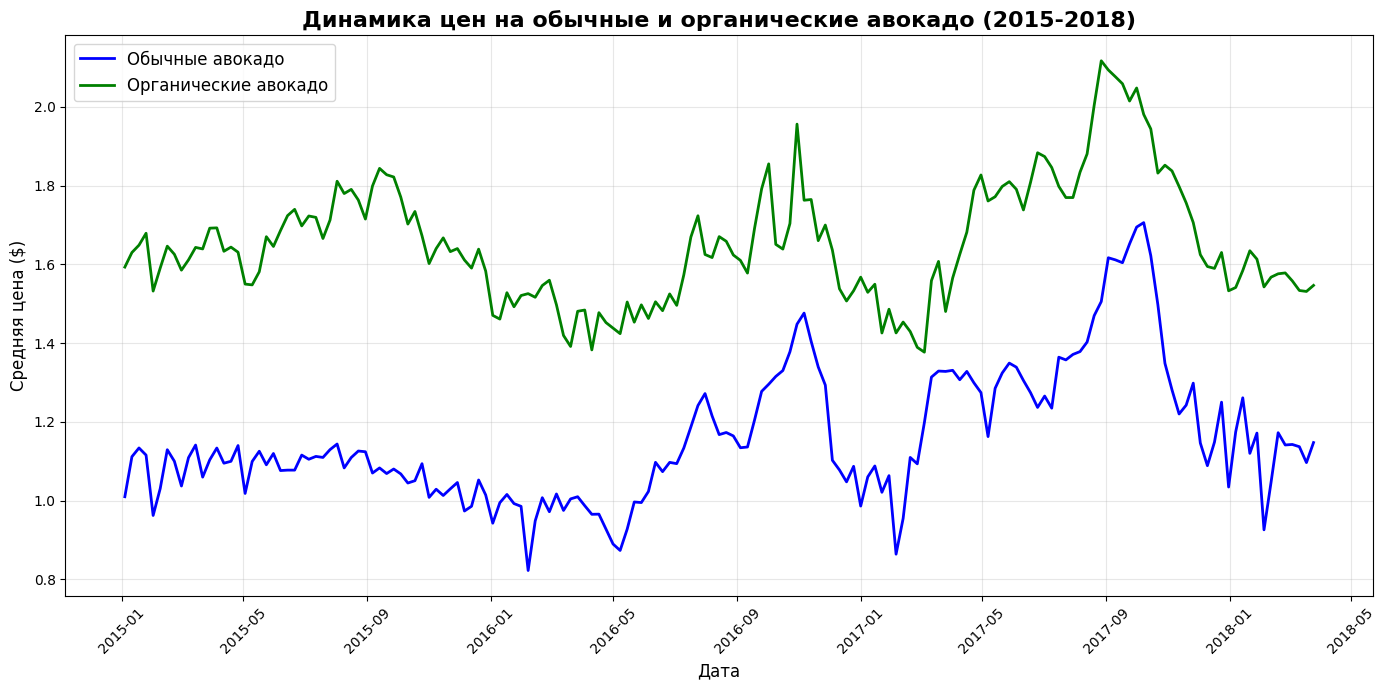

In [19]:
print("\n\tГрафик сравнения тенденций")

df['Date'] = pd.to_datetime(df['Date'])
price_trend = df.groupby(['Date', 'type'])['AveragePrice'].mean().unstack()

plt.figure(figsize=(14, 7))
plt.plot(price_trend.index, price_trend['conventional'], label='Обычные авокадо', linewidth=2, color='blue')
plt.plot(price_trend.index, price_trend['organic'], label='Органические авокадо', linewidth=2, color='green')

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя цена ($)', fontsize=12)
plt.title('Динамика цен на обычные и органические авокадо (2015-2018)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('динамика_цен.png', dpi=300, bbox_inches='tight')
plt.show()


	Региональное сравнение


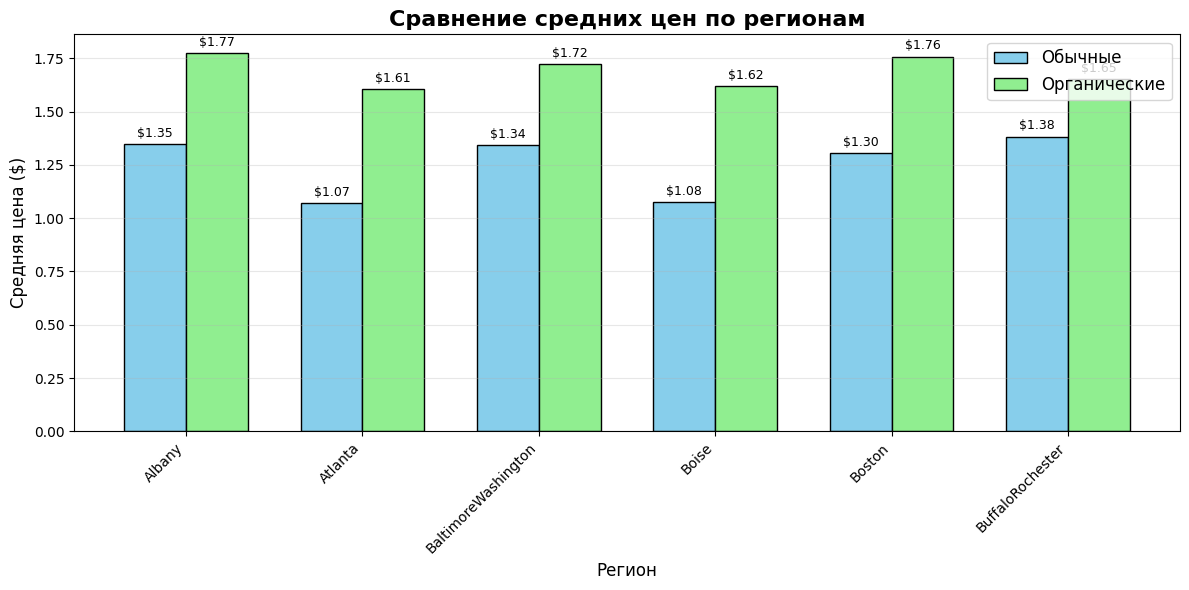

In [20]:
print("\n\tРегиональное сравнение")

top_regions = df['region'].value_counts().head(6).index.tolist()
region_data = df[df['region'].isin(top_regions)]
region_avg_price = region_data.groupby(['region', 'type'])['AveragePrice'].mean().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(top_regions))
width = 0.35

bars1 = ax.bar(x - width/2, region_avg_price['conventional'], width,
               label='Обычные', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, region_avg_price['organic'], width,
               label='Органические', color='lightgreen', edgecolor='black')

ax.set_xlabel('Регион', fontsize=12)
ax.set_ylabel('Средняя цена ($)', fontsize=12)
ax.set_title('Сравнение средних цен по регионам', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_regions, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'${height:.2f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', fontsize=9)

plt.tight_layout()
#plt.savefig('цены_по_регионам.png', dpi=300, bbox_inches='tight')
plt.show()


	Сравнение распределений


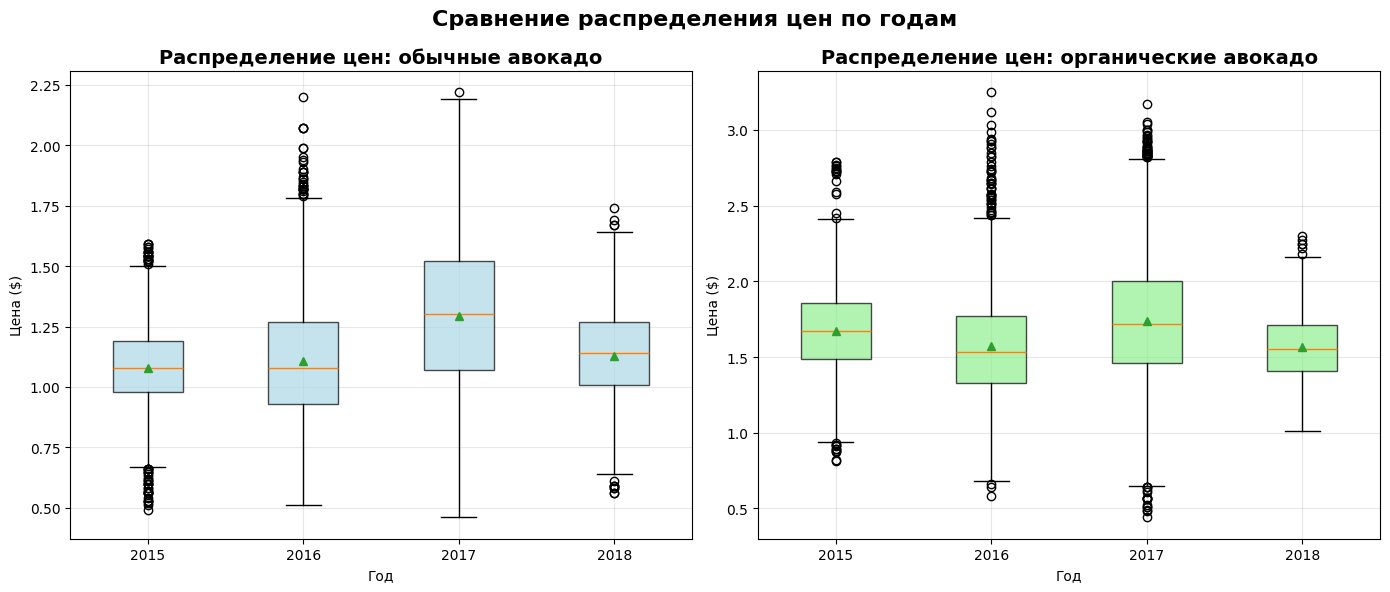

In [21]:
print("\n\tСравнение распределений")

df['year'] = df['Date'].dt.year

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Распределение обычных авокадо по годам
conventional_data = [df[(df['type'] == 'conventional') & (df['year'] == year)]['AveragePrice'].values
                     for year in sorted(df['year'].unique())]
box1 = ax1.boxplot(conventional_data, patch_artist=True, showmeans=True)
ax1.set_title('Распределение цен: обычные авокадо', fontsize=14, fontweight='bold')
ax1.set_xlabel('Год')
ax1.set_ylabel('Цена ($)')
ax1.set_xticklabels(sorted(df['year'].unique()))
ax1.grid(True, alpha=0.3)

for box in box1['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

# Распределение органических авокадо по годам
organic_data = [df[(df['type'] == 'organic') & (df['year'] == year)]['AveragePrice'].values
                for year in sorted(df['year'].unique())]
box2 = ax2.boxplot(organic_data, patch_artist=True, showmeans=True)
ax2.set_title('Распределение цен: органические авокадо', fontsize=14, fontweight='bold')
ax2.set_xlabel('Год')
ax2.set_ylabel('Цена ($)')
ax2.set_xticklabels(sorted(df['year'].unique()))
ax2.grid(True, alpha=0.3)

for box in box2['boxes']:
    box.set_facecolor('lightgreen')
    box.set_alpha(0.7)

plt.suptitle('Сравнение распределения цен по годам', fontsize=16, fontweight='bold')
plt.tight_layout()
#plt.savefig('распределение_цен.png', dpi=300, bbox_inches='tight')
plt.show()



	Комплексное сравнение


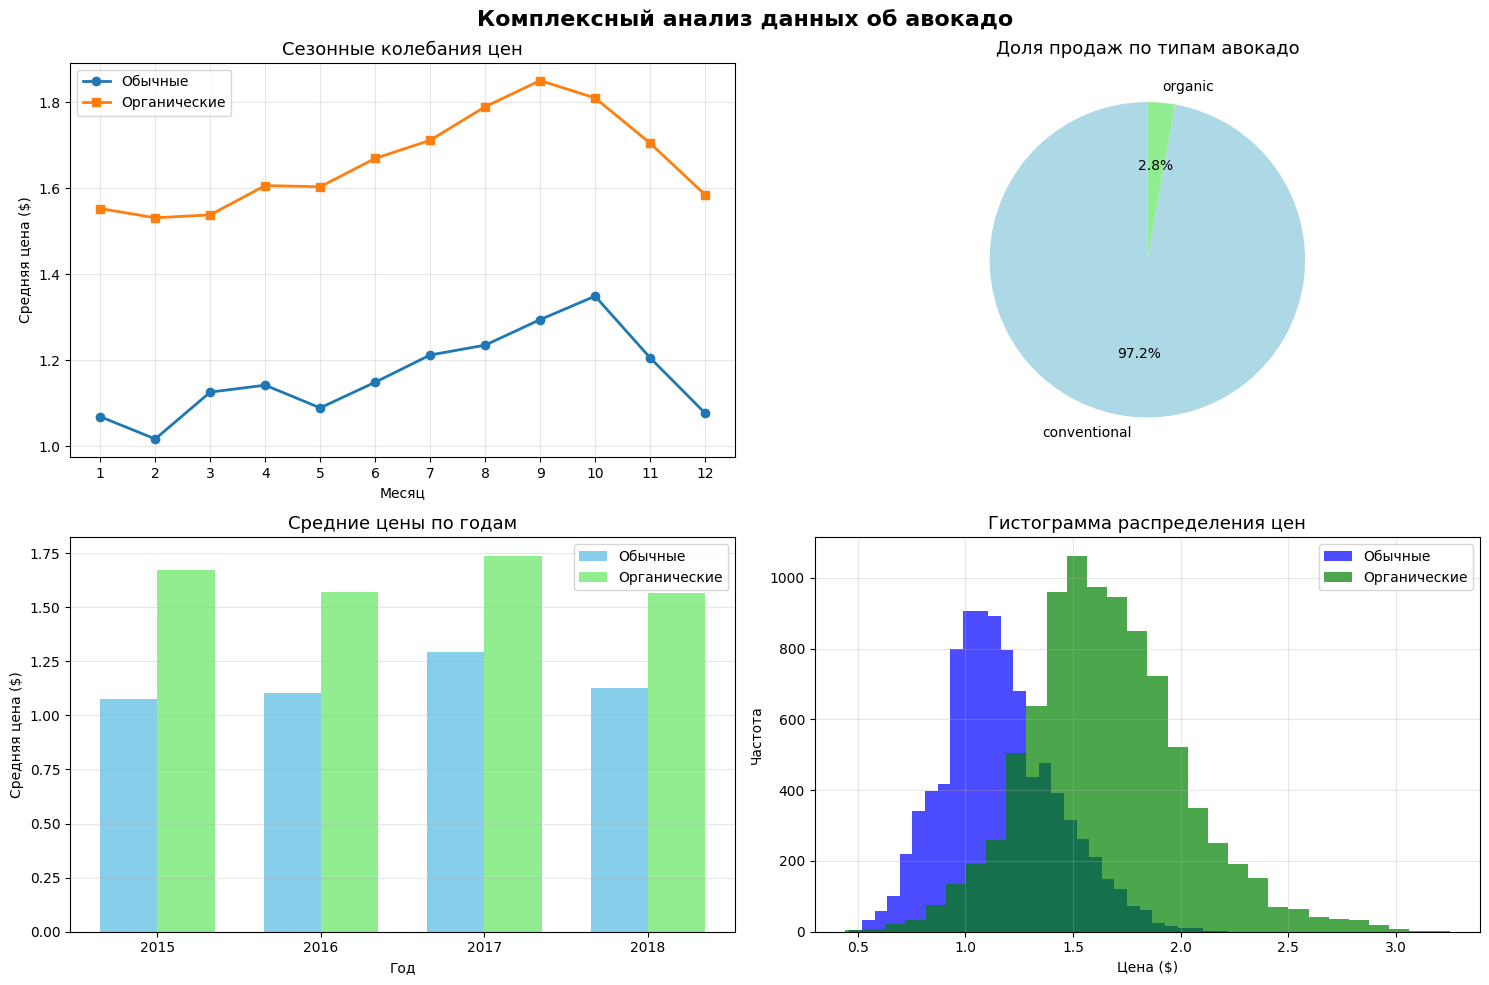

In [22]:
print("\n\tКомплексное сравнение")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Месячные тенденции
df['month'] = df['Date'].dt.month
monthly_price = df.groupby(['month', 'type'])['AveragePrice'].mean().unstack()
axes[0, 0].plot(monthly_price.index, monthly_price['conventional'], 'o-', label='Обычные', linewidth=2)
axes[0, 0].plot(monthly_price.index, monthly_price['organic'], 's-', label='Органические', linewidth=2)
axes[0, 0].set_title('Сезонные колебания цен', fontsize=13)
axes[0, 0].set_xlabel('Месяц')
axes[0, 0].set_ylabel('Средняя цена ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(1, 13))

# График 2: Доля продаж по типам
type_volume = df.groupby('type')['Total Volume'].sum()
axes[0, 1].pie(type_volume, labels=type_volume.index, autopct='%1.1f%%',
               colors=['lightblue', 'lightgreen'], startangle=90)
axes[0, 1].set_title('Доля продаж по типам авокадо', fontsize=13)

# График 3: Средние цены по годам
yearly_price = df.groupby(['year', 'type'])['AveragePrice'].mean().unstack()
x_years = np.arange(len(yearly_price.index))
width = 0.35
axes[1, 0].bar(x_years - width/2, yearly_price['conventional'], width, label='Обычные', color='skyblue')
axes[1, 0].bar(x_years + width/2, yearly_price['organic'], width, label='Органические', color='lightgreen')
axes[1, 0].set_title('Средние цены по годам', fontsize=13)
axes[1, 0].set_xlabel('Год')
axes[1, 0].set_ylabel('Средняя цена ($)')
axes[1, 0].set_xticks(x_years)
axes[1, 0].set_xticklabels(yearly_price.index)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# График 4: Гистограмма распределения цен
conventional_df = df[df['type'] == 'conventional']
organic_df = df[df['type'] == 'organic']
axes[1, 1].hist(conventional_df['AveragePrice'], bins=30, alpha=0.7, label='Обычные', color='blue')
axes[1, 1].hist(organic_df['AveragePrice'], bins=30, alpha=0.7, label='Органические', color='green')
axes[1, 1].set_title('Гистограмма распределения цен', fontsize=13)
axes[1, 1].set_xlabel('Цена ($)')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Комплексный анализ данных об авокадо', fontsize=16, fontweight='bold')
plt.tight_layout()
#plt.savefig('комплексный_анализ.png', dpi=300, bbox_inches='tight')
plt.show()


	График зависимости цены от объема


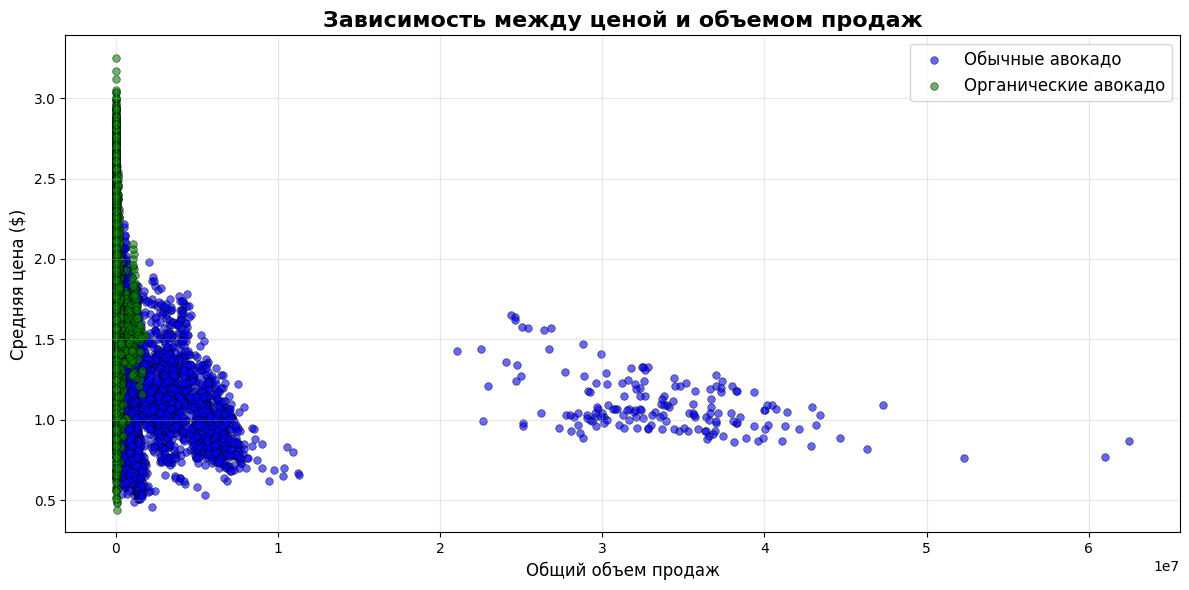

In [23]:
print("\n\tГрафик зависимости цены от объема")

plt.figure(figsize=(12, 6))

plt.scatter(conventional_df['Total Volume'], conventional_df['AveragePrice'],
            alpha=0.6, s=30, label='Обычные авокадо', color='blue', edgecolors='black', linewidth=0.5)
plt.scatter(organic_df['Total Volume'], organic_df['AveragePrice'],
            alpha=0.6, s=30, label='Органические авокадо', color='green', edgecolors='black', linewidth=0.5)

plt.xlabel('Общий объем продаж', fontsize=12)
plt.ylabel('Средняя цена ($)', fontsize=12)
plt.title('Зависимость между ценой и объемом продаж', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('цена_объем.png', dpi=300, bbox_inches='tight')

'''
print("\n🎉 Все графики успешно созданы!")
print("\n📁 Сохраненные файлы:")
print("1. динамика_цен.png - Тенденции изменения цен")
print("2. цены_по_регионам.png - Сравнение цен в разных регионах")
print("3. распределение_цен.png - Распределение цен по годам")
print("4. комплексный_анализ.png - Комплексное сравнение")
print("5. цена_объем.png - Зависимость цены от объема продаж")
'''
plt.show()